SP500 Index
01/02/2013~12/06/2018
'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '', ''
only take date, and Adj Close
2013-01-02 is the base date

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
## Reading csv files
def read_file(filename):
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        if line.find("Date") != -1:
            continue
        line_no_newline = line.rstrip()
        line_split = line_no_newline.split(",")
        #time1 = int(line_split[0])
        time1 = line_split[0]
        spidx = line_split[5]
        #spidx = float(line_split[5])
        if len(time1)>0 and len(spidx)>0:
            data_array.append([time1,spidx])
        #data_array.append(line_split)
    return data_array

In [3]:
time_sp500index_data = read_file("GSPC12062018.csv")

In [5]:
time_sp500index_data[0:4]

[['2013-01-02', '1462.420044'],
 ['2013-01-03', '1459.369995'],
 ['2013-01-04', '1466.469971'],
 ['2013-01-07', '1461.890015']]

In [6]:
rawXY=np.array(time_sp500index_data)

In [7]:
print(rawXY[:2])

[['2013-01-02' '1462.420044']
 ['2013-01-03' '1459.369995']]


In [8]:
rawX=rawXY[:,0]

In [9]:
print(rawX)
print(len(rawX))
print(rawX[1])
#2013-01-02 is the base date

['2013-01-02' '2013-01-03' '2013-01-04' ... '2017-12-27' '2017-12-28'
 '2017-12-29']
1259
2013-01-03


In [10]:
#np.busday_count(np.datetime64('2011-07-11'), np.datetime64('2011-07-18'))
modX=np.array([np.busday_count(np.datetime64('2013-01-02'), np.datetime64(d)) for d in rawX])

In [11]:
print(modX)
print(len(modX))
print(modX[1])
print(modX[:35])

[   0    1    2 ... 1300 1301 1302]
1259
1
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36]


In [12]:
rawY=rawXY[:,1]
modY=rawY.astype(np.float)

In [13]:
print(modY)
print(len(modY))
print(modY[1])
print(type(modY[1]))

[1462.420044 1459.369995 1466.469971 ... 2682.620117 2687.540039
 2673.610107]
1259
1459.369995
<class 'numpy.float64'>


In [14]:
# Polynomial fit using Numpy
Order = 4
fit = np.polyfit(modX,modY,Order)
print("Coeff ", fit)
fit1 = np.poly1d(fit,variable="t")
print(fit1)
y1 = fit1(modX)

Coeff  [ 6.64880772e-10  4.88067040e-08 -1.97829117e-03  2.01625657e+00
  1.43176410e+03]
           4             3            2
6.649e-10 t + 4.881e-08 t - 0.001978 t + 2.016 t + 1432


In [15]:
# Using polynomial equation, find the value of I for time interval in 1 day
nums = []
y_calculated = []
for val in range(len(modX)):
    nums.append(val)
    y_calculated.append(fit1(val))  

In [16]:
# print to check
print(y_calculated[0:5])
print(len(y_calculated))
print(len(modX))

[1431.764102820074, 1433.7783811481838, 1435.7887031961004, 1437.7950692805998, 1439.7974797344148]
1259
1259


1302 1457.150024 2690.159912


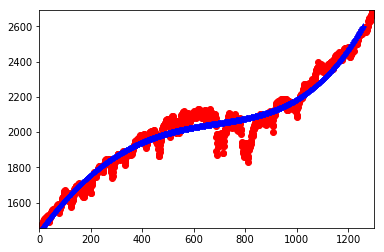

In [17]:
plt.plot(modX,modY,'ro')
plt.plot(nums,y_calculated,'b+')
maxt=modX.max()
minp=modY.min()
maxp=modY.max()
print(maxt,minp,maxp)
plt.axis([0,maxt,minp,maxp])
plt.show()

In [18]:
# OK, now predict values for 1667 (1 year later) and 2132 (2 years later from 12/06/2018)
print(fit1(1667))
print(fit1(2132))

4655.863102880233
10948.250510486478


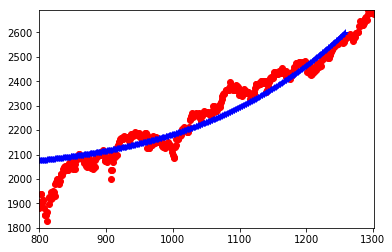

In [19]:
# Zoom in to see details
plt.plot(modX,modY,'ro')
plt.plot(nums,y_calculated,'b+')
plt.axis([800,1302,1800,maxp])
plt.show()

In [20]:
# search other model or fit: google scikit log fit